In [90]:
pip install pandas matplotlib plotnine

In [22]:
from pathlib import Path
import os
base_path = Path(os.path.abspath("")).parent
data_path = base_path / "795173" / "deduped" / "au.dk_deduped.ndjson"

print(data_path)

/work/795173/deduped/au.dk_deduped.ndjson


In [23]:
import pandas as pd
df = pd.read_json(data_path, lines=True)
df["text"][5]

'Samarbejde med forskere Samarbejde med studerende Gymnasier Gymnasieportalen Det rullende universitet Myndigheder Myndighedsrådgivning Samarbejde Om AU Organisation Fakulteter Institutter Centre Ledelse Administration Organisationsdiagram Kontakt Bygningskort Kontaktoplysninger Telefon, e-mail og adresser for alle ansatte Whistleblowerordning Profil Strategi AU i tal Internationalt samarbejde Bæredygtighed Campus 2.0 Job Ledige stillinger på AU Job- og projektbank for studerende og nyuddannede Om AU Du er her: AU Nyheder Strålende forskning modtog hæder En af landets ældste og fornemste videnskabspriser, Rigmor og Carl Holst-Knudsens Videnskabspris, blev overrakt til professor Ann Wenzel for hendes karrierelange pionerarbejde inden for oral radiologi. Ved samme ceremoni overrakte Aarhus Universitets Forskningsfond årets talentpriser til fem unge forskningstalenter. Prismodtager, professor Ann Wenzel. Foto: Lars Kruse, AU Foto Foto: Lars Kruse, AU Foto 29. maj 2019 af Rasmus Rørbæk Lan

<Axes: >

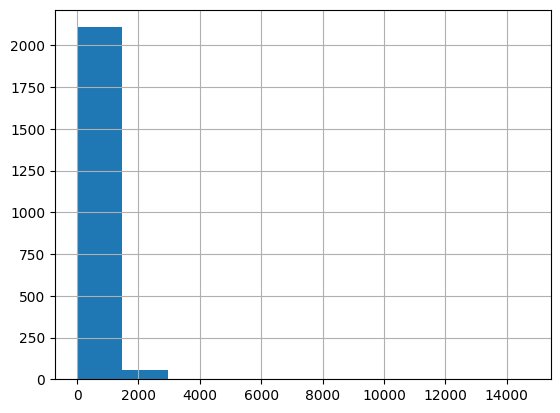

In [33]:
text_lengths = df["text"].str.split().map(lambda x: len(x))
text_lengths.hist()

In [34]:
text_lengths.describe()

count     2173.000000
mean       515.223654
std        616.275809
min         12.000000
25%        204.000000
50%        378.000000
75%        662.000000
max      14699.000000
Name: text, dtype: float64

In [35]:
percentile_95 = text_lengths.quantile(0.95)
text_lengths_filtered = text_lengths[text_lengths < percentile_95]

In [55]:
# Most frequent words
from collections import Counter, defaultdict
webpages_split = df["text"].str.split().values.tolist()

word_counts = defaultdict(int)

for split_webpage in webpages_split:
    for word in split_webpage:
        word_counts[word.lower()] += 1

word_counts


defaultdict(int,
            {'samarbejde': 8118,
             'med': 13084,
             'forskere': 3069,
             'studerende': 5389,
             'gymnasier': 1736,
             'gymnasieportalen': 1743,
             'det': 11480,
             'rullende': 1744,
             'universitet': 6103,
             'myndigheder': 1742,
             'myndighedsrådgivning': 1666,
             'om': 9909,
             'au': 12911,
             'organisation': 2115,
             'fakulteter': 2879,
             'institutter': 2830,
             'centre': 1926,
             'ledelse': 2025,
             'administration': 1814,
             'organisationsdiagram': 1635,
             'kontakt': 3116,
             'bygningskort': 1639,
             'kontaktoplysninger': 1673,
             'telefon,': 1641,
             'e-mail': 1653,
             'og': 35805,
             'adresser': 1636,
             'for': 21698,
             'alle': 2779,
             'ansatte': 1732,
             'whistl

In [56]:
word_counts_df = pd.DataFrame({"word": word_counts.keys(), "counts": word_counts.values()})
word_counts_df.sort_values("counts", ascending=False)

,word,counts
25,og,35805
33,i,23595
27,for,21698
54,at,17329
42,på,16158
...,...,...
81356,infektionen.,1
81357,vzv-infektion.,1
81358,"immundefekten,",1
81359,defekten.,1


In [83]:
from spacy.lang.da.stop_words import STOP_WORDS
danish_stop_words = STOP_WORDS
print(danish_stop_words)

from spacy.lang.en.stop_words import STOP_WORDS
english_stop_words = STOP_WORDS
print(english_stop_words)

STOP_WORDS = danish_stop_words.union(english_stop_words)
print(STOP_WORDS)

{'tilbage', 'med', 'derved', 'kunne', 'stadig', 'bør', 'mit', 'nogensinde', 'herefter', 'jeg', 'undtagen', 'eneste', 'man', 'heri', 'hvor', 'derpå', 'alligevel', 'derfor', 'nemlig', 'vores', 'hen', 'havde', 'nogle', 'hvorimod', 'imens', 'endnu', 'mine', 'over', 'de', 'jeres', 'min', 'henover', 'nogen', 'aldrig', 'hvilkes', 'denne', 'anden', 'have', 'god', 'så', 'synes', 'lige', 'heller', 'hvorfra', 'længere', 'vore', 'være', 'mange', 'forrige', 'gør', 'mens', 'disse', 'dermed', 'således', 'mindre', 'hvem', 'derfra', 'selv', 'jo', 'ville', 'hvilke', 'gørende', 'enhver', 'hvilken', 'egen', 'via', 'ene', 'fordi', 'lavet', 'flere', 'lidt', 'imod', 'hvordan', 'langs', 'måske', 'andre', 'dette', 'eller', 'lad', 'bag', 'fleste', 'siden', 'øvrigt', 'gjort', 'igennem', 'ham', 'ud', 'senere', 'nu', 'ikke', 'hvad', 'flest', 'få', 'er', 'alene', 'tidligere', 'om', 'til', 'han', 'overalt', 'hvis', 'selvom', 'hende', 'lille', 'nyt', 'omkring', 'skulle', 'før', 'vil', 'været', 'hans', 'igen', 'andet'

In [91]:
non_stop_word_counts = word_counts_df[~word_counts_df["word"].isin(STOP_WORDS)].sort_values(by="counts", ascending=False)
non_stop_word_counts.head(10)

,word,counts
12,au,12911
90,aarhus,10476
0,samarbejde,8118
60,-,7436
8,universitet,6103
3,studerende,5389
20,kontakt,3116
2,forskere,3069
14,fakulteter,2879
311,institut,2860


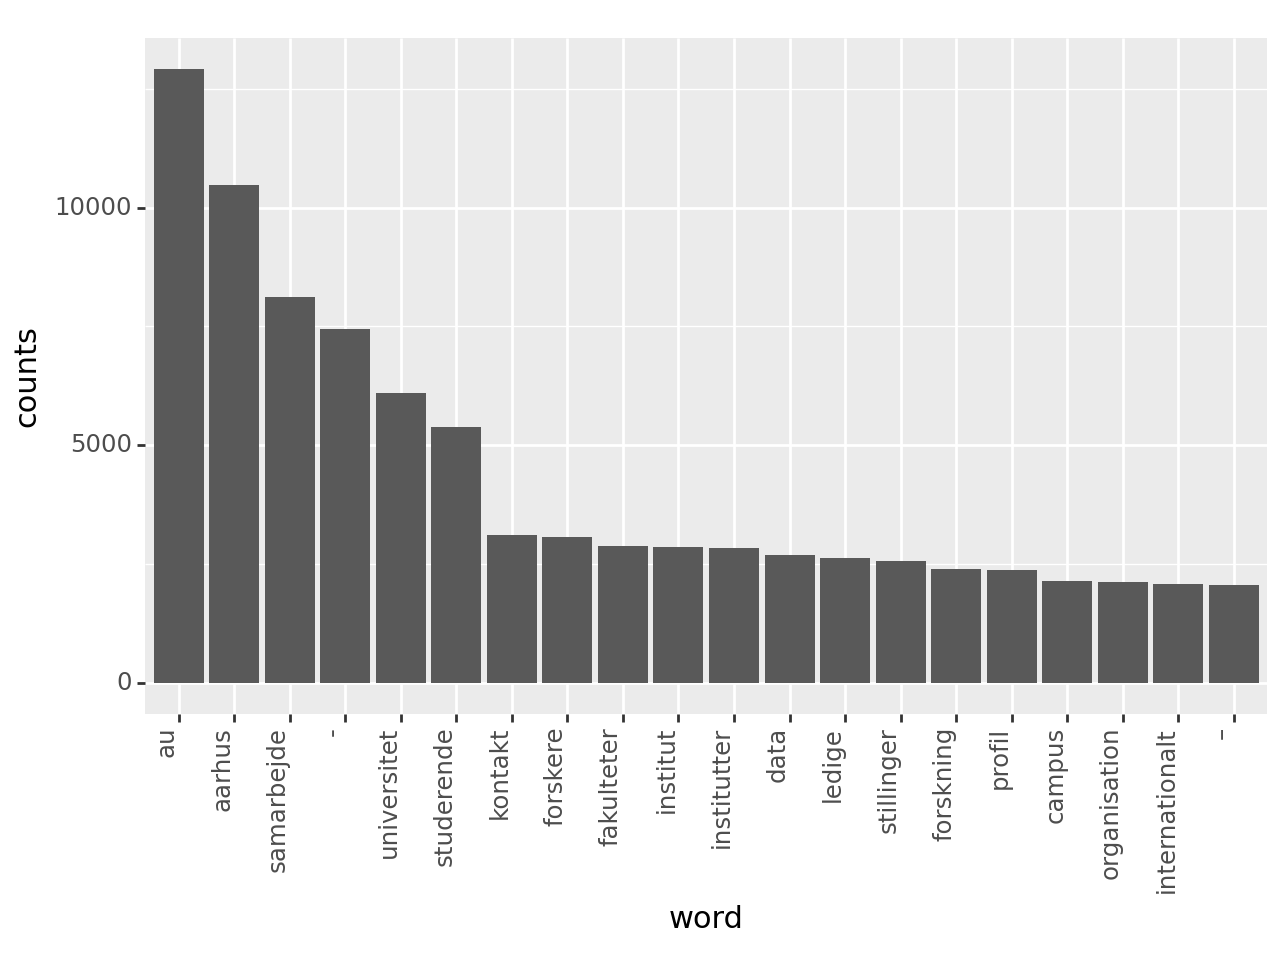

<Figure Size: (640 x 480)>

In [88]:
import plotnine as pn

# Create some categories so the x-axis on our bar-plot is sorted by count instead of alphabetically
word_names = non_stop_word_counts["word"]
non_stop_word_counts["word"] = pd.Categorical(non_stop_word_counts["word"], categories=word_names)

(pn.ggplot(non_stop_word_counts.head(20), pn.aes(x="word", y="counts")) + 
    pn.geom_bar(stat="identity") + 
    pn.theme(axis_text_x=pn.element_text(rotation=90, hjust=1)))

<Axes: >

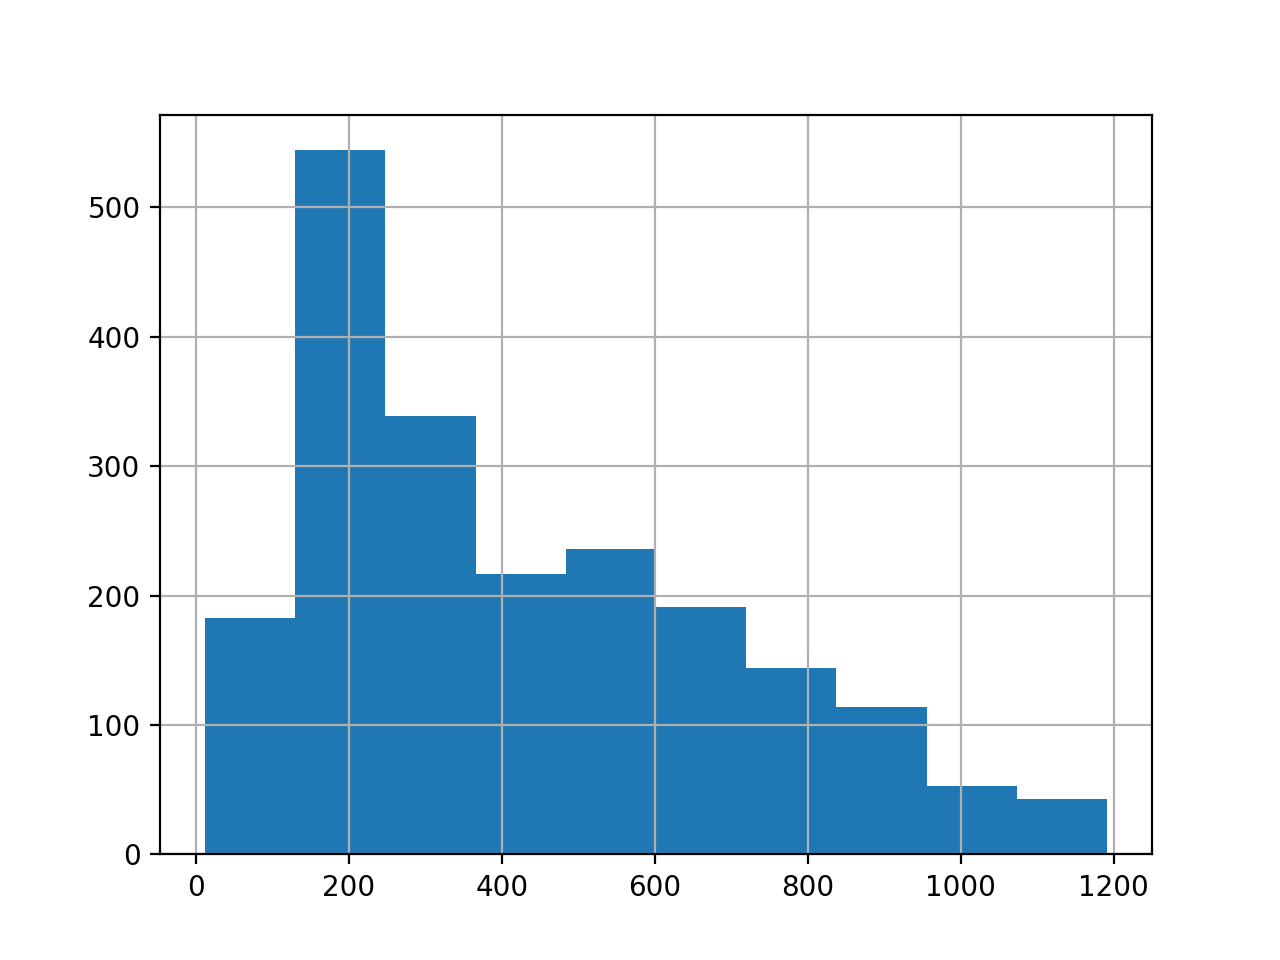

In [89]:
text_lengths_filtered.hist()